In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
import nltk 
nltk.download('stopwords')
from textblob import TextBlob 
from wordcloud import WordCloud
import re 
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
print("Setup Complete")

Setup Complete


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('NEWS_YAHOO_stock_prediction.csv')

data.head(5)

,Unnamed: 0,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
0,0.0,AAPL,7/23/2012,opinion,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.257221,487975600.0,1.0
1,1.0,AAPL,7/23/2012,opinion,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.692142,21.774286,21.375357,21.461430,18.169237,565132400.0,1.0
2,2.0,AAPL,7/23/2012,opinion,Trade Apple After Earnings,It may look like a spider web but the mishmas...,20.516430,20.742857,20.357143,20.534643,17.384607,877312800.0,1.0
3,3.0,AAPL,7/24/2012,opinion,Market Bait And Switch,That is the sound we are going to hear soon fr...,20.705713,20.728571,20.370001,20.531429,17.381897,406632800.0,0.0
4,4.0,AAPL,7/27/2012,opinion,Will AAPL Fall From The Tree,Apple s AAPL sales for the third quarter mis...,20.536072,20.922501,20.413929,20.898571,17.692715,403936400.0,1.0


In [3]:
del data['Unnamed: 0']
del data['category']

data.head(5)

,ticker,Date,title,content,Open,High,Low,Close,Adj Close,Volume,label
0,AAPL,7/23/2012,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.257221,487975600.0,1.0
1,AAPL,7/23/2012,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.692142,21.774286,21.375357,21.461430,18.169237,565132400.0,1.0
2,AAPL,7/23/2012,Trade Apple After Earnings,It may look like a spider web but the mishmas...,20.516430,20.742857,20.357143,20.534643,17.384607,877312800.0,1.0
3,AAPL,7/24/2012,Market Bait And Switch,That is the sound we are going to hear soon fr...,20.705713,20.728571,20.370001,20.531429,17.381897,406632800.0,0.0
4,AAPL,7/27/2012,Will AAPL Fall From The Tree,Apple s AAPL sales for the third quarter mis...,20.536072,20.922501,20.413929,20.898571,17.692715,403936400.0,1.0


In [4]:
def remove_punctuation(text):
    if isinstance(text, str):
        punctuation_free = "".join([i for i in text if i not in string.punctuation])
        return punctuation_free
    else:
        return str(text)

In [5]:
data["clean_title"] = data["title"].apply(lambda x: remove_punctuation(x))
data["clean_title"] = data["clean_title"].apply(lambda x: x.lower())

data['clean_content'] = data['content'].apply(lambda x: remove_punctuation(x))
data['clean_content'] = data['clean_content'].apply(lambda x: x.lower())

data.head(10)

,ticker,Date,title,content,Open,High,Low,Close,Adj Close,Volume,label,clean_title,clean_content
0,AAPL,7/23/2012,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.257221,487975600.0,1.0,summer heat scorches europe and u s,europe flares as summer heat continues summer...
1,AAPL,7/23/2012,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.692142,21.774286,21.375357,21.461430,18.169237,565132400.0,1.0,apple earnings preview quarterly dip on deck,last quarter apple aapl reported the 2nd bes...
2,AAPL,7/23/2012,Trade Apple After Earnings,It may look like a spider web but the mishmas...,20.516430,20.742857,20.357143,20.534643,17.384607,877312800.0,1.0,trade apple after earnings,it may look like a spider web but the mishmas...
3,AAPL,7/24/2012,Market Bait And Switch,That is the sound we are going to hear soon fr...,20.705713,20.728571,20.370001,20.531429,17.381897,406632800.0,0.0,market bait and switch,that is the sound we are going to hear soon fr...
4,AAPL,7/27/2012,Will AAPL Fall From The Tree,Apple s AAPL sales for the third quarter mis...,20.536072,20.922501,20.413929,20.898571,17.692715,403936400.0,1.0,will aapl fall from the tree,apple s aapl sales for the third quarter mis...
5,AAPL,7/30/2012,Bulls Snatch Victory From Jaws of Defeat,Last week the bulls pulled another save out o...,21.104286,21.408571,20.993570,21.251072,17.991142,379142400.0,1.0,bulls snatch victory from jaws of defeat,last week the bulls pulled another save out o...
6,AAPL,7/31/2012,What s Driving China s Real Estate Rally Par...,In the preceding posts I examined the first t...,21.543928,21.846430,21.525715,21.812857,18.466749,462327600.0,1.0,what s driving china s real estate rally par...,in the preceding posts i examined the first t...
7,AAPL,7/31/2012,50 Stocks With The Best Dividend Growth In Jul...,Here is a current sheet of companies with fast...,21.996786,22.014286,21.535713,21.671785,18.347322,384501600.0,1.0,50 stocks with the best dividend growth in jul...,here is a current sheet of companies with fast...
8,AAPL,8/10/2012,Good Knight Public Markets,With all of the recent financial scandals and ...,21.530001,21.810356,21.437500,21.706785,18.376951,332158400.0,0.0,good knight public markets,with all of the recent financial scandals and ...
9,AAPL,8/14/2012,VIX Is Under 14 Now What,OK trader buddies I bet this is something you ...,21.915358,22.070715,21.841429,21.989286,18.616117,344920800.0,0.0,vix is under 14 now what,ok trader buddies i bet this is something you ...


In [6]:
def tokenize(text):
    tokens = re.split("W+", text)
    return tokens

In [7]:
data['title_tokenize'] = data['clean_title'].apply(lambda x: tokenize(x))
data['content_tokenize'] = data['clean_content'].apply(lambda x: tokenize(x))

data.head(10)

,ticker,Date,title,content,Open,High,Low,Close,Adj Close,Volume,label,clean_title,clean_content,title_tokenize,content_tokenize
0,AAPL,7/23/2012,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.257221,487975600.0,1.0,summer heat scorches europe and u s,europe flares as summer heat continues summer...,[summer heat scorches europe and u s ],[europe flares as summer heat continues summe...
1,AAPL,7/23/2012,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.692142,21.774286,21.375357,21.461430,18.169237,565132400.0,1.0,apple earnings preview quarterly dip on deck,last quarter apple aapl reported the 2nd bes...,[apple earnings preview quarterly dip on deck ],[last quarter apple aapl reported the 2nd be...
2,AAPL,7/23/2012,Trade Apple After Earnings,It may look like a spider web but the mishmas...,20.516430,20.742857,20.357143,20.534643,17.384607,877312800.0,1.0,trade apple after earnings,it may look like a spider web but the mishmas...,[trade apple after earnings],[it may look like a spider web but the mishma...
3,AAPL,7/24/2012,Market Bait And Switch,That is the sound we are going to hear soon fr...,20.705713,20.728571,20.370001,20.531429,17.381897,406632800.0,0.0,market bait and switch,that is the sound we are going to hear soon fr...,[market bait and switch],[that is the sound we are going to hear soon f...
4,AAPL,7/27/2012,Will AAPL Fall From The Tree,Apple s AAPL sales for the third quarter mis...,20.536072,20.922501,20.413929,20.898571,17.692715,403936400.0,1.0,will aapl fall from the tree,apple s aapl sales for the third quarter mis...,[will aapl fall from the tree ],[apple s aapl sales for the third quarter mi...
5,AAPL,7/30/2012,Bulls Snatch Victory From Jaws of Defeat,Last week the bulls pulled another save out o...,21.104286,21.408571,20.993570,21.251072,17.991142,379142400.0,1.0,bulls snatch victory from jaws of defeat,last week the bulls pulled another save out o...,[bulls snatch victory from jaws of defeat],[last week the bulls pulled another save out ...
6,AAPL,7/31/2012,What s Driving China s Real Estate Rally Par...,In the preceding posts I examined the first t...,21.543928,21.846430,21.525715,21.812857,18.466749,462327600.0,1.0,what s driving china s real estate rally par...,in the preceding posts i examined the first t...,[what s driving china s real estate rally pa...,[in the preceding posts i examined the first ...
7,AAPL,7/31/2012,50 Stocks With The Best Dividend Growth In Jul...,Here is a current sheet of companies with fast...,21.996786,22.014286,21.535713,21.671785,18.347322,384501600.0,1.0,50 stocks with the best dividend growth in jul...,here is a current sheet of companies with fast...,[50 stocks with the best dividend growth in ju...,[here is a current sheet of companies with fas...
8,AAPL,8/10/2012,Good Knight Public Markets,With all of the recent financial scandals and ...,21.530001,21.810356,21.437500,21.706785,18.376951,332158400.0,0.0,good knight public markets,with all of the recent financial scandals and ...,[good knight public markets],[with all of the recent financial scandals and...
9,AAPL,8/14/2012,VIX Is Under 14 Now What,OK trader buddies I bet this is something you ...,21.915358,22.070715,21.841429,21.989286,18.616117,344920800.0,0.0,vix is under 14 now what,ok trader buddies i bet this is something you ...,[vix is under 14 now what ],[ok trader buddies i bet this is something you...


In [8]:
stopwords = nltk.corpus.stopwords.words("english")

def remove_words(text):   
    cleaned = [i for i in text if not i in stopwords]
    return cleaned

In [9]:
data['stopless_title'] = data['title_tokenize'].apply(lambda x: remove_words(x))
data['stopless_content'] = data['content_tokenize'].apply(lambda x: remove_words(x))

data.head(5)

,ticker,Date,title,content,Open,High,Low,Close,Adj Close,Volume,label,clean_title,clean_content,title_tokenize,content_tokenize,stopless_title,stopless_content
0,AAPL,7/23/2012,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.257221,487975600.0,1.0,summer heat scorches europe and u s,europe flares as summer heat continues summer...,[summer heat scorches europe and u s ],[europe flares as summer heat continues summe...,[summer heat scorches europe and u s ],[europe flares as summer heat continues summe...
1,AAPL,7/23/2012,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.692142,21.774286,21.375357,21.461430,18.169237,565132400.0,1.0,apple earnings preview quarterly dip on deck,last quarter apple aapl reported the 2nd bes...,[apple earnings preview quarterly dip on deck ],[last quarter apple aapl reported the 2nd be...,[apple earnings preview quarterly dip on deck ],[last quarter apple aapl reported the 2nd be...
2,AAPL,7/23/2012,Trade Apple After Earnings,It may look like a spider web but the mishmas...,20.516430,20.742857,20.357143,20.534643,17.384607,877312800.0,1.0,trade apple after earnings,it may look like a spider web but the mishmas...,[trade apple after earnings],[it may look like a spider web but the mishma...,[trade apple after earnings],[it may look like a spider web but the mishma...
3,AAPL,7/24/2012,Market Bait And Switch,That is the sound we are going to hear soon fr...,20.705713,20.728571,20.370001,20.531429,17.381897,406632800.0,0.0,market bait and switch,that is the sound we are going to hear soon fr...,[market bait and switch],[that is the sound we are going to hear soon f...,[market bait and switch],[that is the sound we are going to hear soon f...
4,AAPL,7/27/2012,Will AAPL Fall From The Tree,Apple s AAPL sales for the third quarter mis...,20.536072,20.922501,20.413929,20.898571,17.692715,403936400.0,1.0,will aapl fall from the tree,apple s aapl sales for the third quarter mis...,[will aapl fall from the tree ],[apple s aapl sales for the third quarter mi...,[will aapl fall from the tree ],[apple s aapl sales for the third quarter mi...


In [10]:
p_stemmer = PorterStemmer()

def stem(text):
    text_stem = [p_stemmer.stem(word) for word in text]
    return text_stem 

In [11]:
data['title_stemmed'] = data['stopless_title'].apply(lambda x: stem(x))
data['content_stemmed'] = data['stopless_content'].apply(lambda x: stem(x))

data.head(5)

,ticker,Date,title,content,Open,High,Low,Close,Adj Close,Volume,label,clean_title,clean_content,title_tokenize,content_tokenize,stopless_title,stopless_content,title_stemmed,content_stemmed
0,AAPL,7/23/2012,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.257221,487975600.0,1.0,summer heat scorches europe and u s,europe flares as summer heat continues summer...,[summer heat scorches europe and u s ],[europe flares as summer heat continues summe...,[summer heat scorches europe and u s ],[europe flares as summer heat continues summe...,[summer heat scorches europe and u s ],[europe flares as summer heat continues summe...
1,AAPL,7/23/2012,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.692142,21.774286,21.375357,21.461430,18.169237,565132400.0,1.0,apple earnings preview quarterly dip on deck,last quarter apple aapl reported the 2nd bes...,[apple earnings preview quarterly dip on deck ],[last quarter apple aapl reported the 2nd be...,[apple earnings preview quarterly dip on deck ],[last quarter apple aapl reported the 2nd be...,[apple earnings preview quarterly dip on deck ],[last quarter apple aapl reported the 2nd be...
2,AAPL,7/23/2012,Trade Apple After Earnings,It may look like a spider web but the mishmas...,20.516430,20.742857,20.357143,20.534643,17.384607,877312800.0,1.0,trade apple after earnings,it may look like a spider web but the mishmas...,[trade apple after earnings],[it may look like a spider web but the mishma...,[trade apple after earnings],[it may look like a spider web but the mishma...,[trade apple after earn],[it may look like a spider web but the mishma...
3,AAPL,7/24/2012,Market Bait And Switch,That is the sound we are going to hear soon fr...,20.705713,20.728571,20.370001,20.531429,17.381897,406632800.0,0.0,market bait and switch,that is the sound we are going to hear soon fr...,[market bait and switch],[that is the sound we are going to hear soon f...,[market bait and switch],[that is the sound we are going to hear soon f...,[market bait and switch],[that is the sound we are going to hear soon f...
4,AAPL,7/27/2012,Will AAPL Fall From The Tree,Apple s AAPL sales for the third quarter mis...,20.536072,20.922501,20.413929,20.898571,17.692715,403936400.0,1.0,will aapl fall from the tree,apple s aapl sales for the third quarter mis...,[will aapl fall from the tree ],[apple s aapl sales for the third quarter mi...,[will aapl fall from the tree ],[apple s aapl sales for the third quarter mi...,[will aapl fall from the tree ],[apple s aapl sales for the third quarter mi...


In [12]:
# Selecting the data we will use for sentiment analysis
col = ["Date", "ticker", "clean_title", "clean_content"]
sel_data = data[col].copy()

sel_data.head(5)

,Date,ticker,clean_title,clean_content
0,7/23/2012,AAPL,summer heat scorches europe and u s,europe flares as summer heat continues summer...
1,7/23/2012,AAPL,apple earnings preview quarterly dip on deck,last quarter apple aapl reported the 2nd bes...
2,7/23/2012,AAPL,trade apple after earnings,it may look like a spider web but the mishmas...
3,7/24/2012,AAPL,market bait and switch,that is the sound we are going to hear soon fr...
4,7/27/2012,AAPL,will aapl fall from the tree,apple s aapl sales for the third quarter mis...


In [13]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
sel_data['subjectivity_title'] = sel_data['clean_title'].apply(lambda x: subjectivity(x))
sel_data['subjectivity_content'] = sel_data['clean_content'].apply(lambda x: subjectivity(x))

sel_data['polarity_title'] = sel_data['clean_title'].apply(lambda x: polarity(x))
sel_data['polarity_content'] = sel_data['clean_content'].apply(lambda x: polarity(x))

sel_data.head(5)

,Date,ticker,clean_title,clean_content,subjectivity_title,subjectivity_content,polarity_title,polarity_content
0,7/23/2012,AAPL,summer heat scorches europe and u s,europe flares as summer heat continues summer...,0.0,0.360324,0.0,0.115828
1,7/23/2012,AAPL,apple earnings preview quarterly dip on deck,last quarter apple aapl reported the 2nd bes...,0.0,0.415023,0.0,0.099617
2,7/23/2012,AAPL,trade apple after earnings,it may look like a spider web but the mishmas...,0.0,0.350683,0.0,0.083523
3,7/24/2012,AAPL,market bait and switch,that is the sound we are going to hear soon fr...,0.0,0.470486,0.0,-0.003319
4,7/27/2012,AAPL,will aapl fall from the tree,apple s aapl sales for the third quarter mis...,0.0,0.283718,0.0,0.084097


In [15]:
def sentiment(score):
    if score < 0:
        sentiment = -1 # -1 is negative
    elif score == 0:
        sentiment = 0 # 0 is neutral
    else:
        sentiment = 1 # 1 is postive
    
    return sentiment

sel_data['sentiment_title'] = sel_data['polarity_title'].apply(sentiment)
sel_data['sentiment_content'] = sel_data['polarity_content'].apply(sentiment)

sel_data.head(5)

,Date,ticker,clean_title,clean_content,subjectivity_title,subjectivity_content,polarity_title,polarity_content,sentiment_title,sentiment_content
0,7/23/2012,AAPL,summer heat scorches europe and u s,europe flares as summer heat continues summer...,0.0,0.360324,0.0,0.115828,0,1
1,7/23/2012,AAPL,apple earnings preview quarterly dip on deck,last quarter apple aapl reported the 2nd bes...,0.0,0.415023,0.0,0.099617,0,1
2,7/23/2012,AAPL,trade apple after earnings,it may look like a spider web but the mishmas...,0.0,0.350683,0.0,0.083523,0,1
3,7/24/2012,AAPL,market bait and switch,that is the sound we are going to hear soon fr...,0.0,0.470486,0.0,-0.003319,0,-1
4,7/27/2012,AAPL,will aapl fall from the tree,apple s aapl sales for the third quarter mis...,0.0,0.283718,0.0,0.084097,0,1


Title sentiment counts:  sentiment_title
 0    9929
 1    4383
-1    1672
Name: count, dtype: int64


<Axes: xlabel='sentiment_title'>

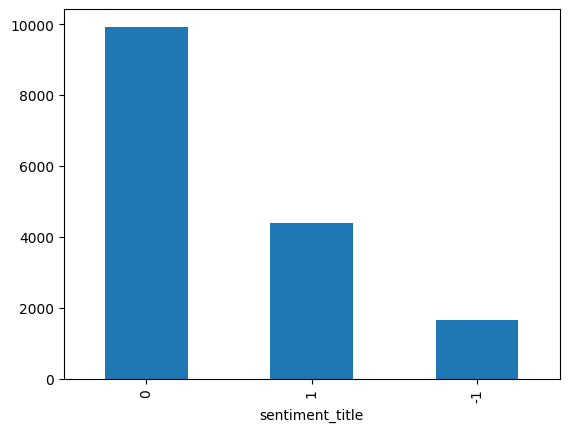

In [16]:
sent_title = sel_data['sentiment_title'].value_counts()
sent_content = sel_data['sentiment_content'].value_counts()

print('Title sentiment counts: ', sent_title)
sent_title.plot.bar()

Content sentiment counts:  sentiment_content
 1    14095
-1     1824
 0       65
Name: count, dtype: int64


<Axes: xlabel='sentiment_content'>

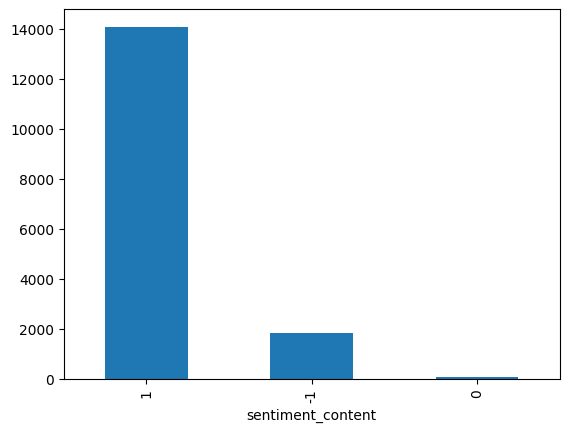

In [17]:
print("Content sentiment counts: ", sent_content)
sent_content.plot.bar()

In [22]:
data['sentiment_title'] = sel_data['sentiment_title']
data["sentiment_content"] = sel_data["sentiment_content"]
data['subjectivity_title'] = sel_data['subjectivity_title']
data['subjectivity_content'] = sel_data['subjectivity_content']
data['polarity_title'] = sel_data['polarity_title']
data['polarity_content'] = sel_data['polarity_content']

data.head(5)

,ticker,Date,title,content,Open,High,Low,Close,Adj Close,Volume,...,stopless_title,stopless_content,title_stemmed,content_stemmed,sentiment_title,sentiment_content,subjectivity_title,subjectivity_content,polarity_title,polarity_content
0,AAPL,7/23/2012,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.257221,487975600.0,...,[summer heat scorches europe and u s ],[europe flares as summer heat continues summe...,[summer heat scorches europe and u s ],[europe flares as summer heat continues summe...,0,1,0.0,0.360324,0.0,0.115828
1,AAPL,7/23/2012,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.692142,21.774286,21.375357,21.461430,18.169237,565132400.0,...,[apple earnings preview quarterly dip on deck ],[last quarter apple aapl reported the 2nd be...,[apple earnings preview quarterly dip on deck ],[last quarter apple aapl reported the 2nd be...,0,1,0.0,0.415023,0.0,0.099617
2,AAPL,7/23/2012,Trade Apple After Earnings,It may look like a spider web but the mishmas...,20.516430,20.742857,20.357143,20.534643,17.384607,877312800.0,...,[trade apple after earnings],[it may look like a spider web but the mishma...,[trade apple after earn],[it may look like a spider web but the mishma...,0,1,0.0,0.350683,0.0,0.083523
3,AAPL,7/24/2012,Market Bait And Switch,That is the sound we are going to hear soon fr...,20.705713,20.728571,20.370001,20.531429,17.381897,406632800.0,...,[market bait and switch],[that is the sound we are going to hear soon f...,[market bait and switch],[that is the sound we are going to hear soon f...,0,-1,0.0,0.470486,0.0,-0.003319
4,AAPL,7/27/2012,Will AAPL Fall From The Tree,Apple s AAPL sales for the third quarter mis...,20.536072,20.922501,20.413929,20.898571,17.692715,403936400.0,...,[will aapl fall from the tree ],[apple s aapl sales for the third quarter mi...,[will aapl fall from the tree ],[apple s aapl sales for the third quarter mi...,0,1,0.0,0.283718,0.0,0.084097


In [23]:
output = data.to_csv('Apple_News_Analyzed.csv', index = False)